## Домашнее задание №7

### Упражение №10.1

**Напишите программу, выполняющую функции простейшего калькулятора. Программа получает два числа, а затем запрашивает оператор. Обеспечьте корректную обработку ввода, который не преобразуется в числа. Обработайте ошибки деления на ноль.**

In [58]:
def basic_calculator(num1, num2):
    try:
        operator = str(input('Введите оператор: '))
        list_operators = ['+','-','*','/']
        return {
            operator == list_operators[0]: int(num1)+int(num2),
            operator == list_operators[1]: int(num1)-int(num2),
            operator == list_operators[2]: int(num1)*int(num2),
            operator == list_operators[3]: int(num1)/int(num2),
            operator not in list_operators: 'Введите корректный оператор'
        }[1]
    
    except ValueError:
        print('Ошибка преобразования типов')
    except ZeroDivisionError:
        print('Ошибка деления на ноль')

**Тесты**

In [59]:
basic_calculator(1,'t')

Введите оператор: +
Ошибка преобразования типов


In [3]:
basic_calculator(1,0)

Введите оператор: /
Ошибка деления на ноль


In [9]:
basic_calculator(1,1)

Введите оператор: 9


'Введите корректный оператор'

### Упражение №10.2

**В файле 10/ temper.stat представлена ежемесячная максимальная температура в градусах по Фаренгейту одного из аэропортов мира в период с 1948 по 2016.**

**Необходимо определить максимальные и минимальные значения, среднюю температуру.**

**Определить, сколько уникальных температур содержится в файле.**

**Постройте график.**

In [237]:
with open('temper.txt','r') as in_file:
    temperature = list(map(float,list(map(lambda x: x.strip(), in_file.readlines())))) # Простите,но просто уже не хочется писать код с for :-) 
    min_temp = min(temperature)
    max_temp = max(temperature)
    mean_temp = sum(temperature)/len(temperature)
    unique_temp = len(list(set(temperature)))

In [239]:
print('Максимальное значение:', max_temp)
print('\nМинимальное значение:', min_temp)
print('\nСреднее заначение:', mean_temp)
print('\nУникальных значений:', unique_temp)

Максимальное значение: 28.2

Минимальное значение: 0.8

Среднее заначение: 14.848309178743966

Уникальных значений: 217


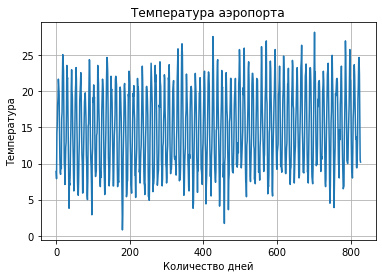

In [3]:
import matplotlib.pyplot as plt

x_coords = temperature

plt.plot(x_coords)

plt.title('Температура аэропорта')

plt.xlabel('Количество дней')
plt.ylabel('Температура')

#plt.xlim(xmin=1, xmax=200) - на таких настройках ещё смотрибельно :-)

plt.grid(True)

plt.show()

**Да, это больно :)**

### Упражение №10.3

**Напиши программу для очистки и нормализации первой главы ‘Моби Дика’, находящегося в файле 10/ moby.txt.**

*1) Все символы должны относиться к одному регистру.*

*2) Удалить все знаки препинания.*

*3) Записать слова по одному на строку во второй файл с именем moby_clean.txt*


In [1]:
%%writefile moby.txt
Call me Ishmael.  Some years ago--never mind how long precisely--
having little or no money in my purse, and nothing particular
to interest me on shore, I thought I would sail about a little
and see the watery part of the world.  It is a way I have
of driving off the spleen and regulating the circulation.
Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I
find myself involuntarily pausing before coffin warehouses,
and bringing up the rear of every funeral I meet;
and especially whenever my hypos get such an upper hand of me,
that it requires a strong moral principle to prevent me from
deliberately stepping into the street, and methodically knocking
people's hats off--then, I account it high time to get to sea
as soon as I can.  This is my substitute for pistol and ball.
With a philosophical flourish Cato throws himself upon his sword;
I quietly take to the ship.  There is nothing surprising in this.
If they but knew it, almost all men in their degree, some time
or other, cherish very nearly the same feelings towards
the ocean with me.

There now is your insular city of the Manhattoes, belted round by wharves
as Indian isles by coral reefs--commerce surrounds it with her surf.
Right and left, the streets take you waterward.  Its extreme downtown
is the battery, where that noble mole is washed by waves, and cooled
by breezes, which a few hours previous were out of sight of land.
Look at the crowds of water-gazers there.

Writing moby.txt


In [218]:
import string

with open('moby.txt','r') as in_file, open('moby_clean.txt','w') as out_file:
    text = in_file.readlines()
    upper_chars = list(map(lambda x: x.upper(), text)) # я честно могу писать не функционально, но это же красиво :-)
    
    translator = str.maketrans('','',string.punctuation)
    without_punctuation = ''.join(list(map(lambda x: x.translate(translator), upper_chars)))
    
    words_text = '\n'.join(without_punctuation.split(" "))
    out_file.writelines(words_text)
    print('Файл был сохранён под именем: moby_clean.txt')

Файл был сохранён под именем: moby_clean.txt


### Упражение №10.4

**Прочитайте содержимое файла moby_clean.txt, полученного в упражнении 10.3. Используйте словарь для подсчета вхождений каждого слова, выведите первые 5 самых частых и самых редких слов.**

In [66]:
def histogram(s):
    '''
    Функция для подсчета встречаемости элементов в коллекции s.
    '''
    word_count = {}
    for word in s:
        word_count.setdefault(word, 0)
        word_count[word] += 1       
    return word_count

In [242]:
with open('moby_clean.txt','r') as in_file:
    text = in_file.read()
    # Чистим текст
    clear_text = text.replace("\n"," ")
    clear_text = clear_text.replace("  "," ")
    
    res_histogram = histogram(clear_text.split())
    sorted_words = sorted(res_histogram.items(), key=lambda x: x[1], reverse=True)
    lenList = len(sorted_words)
    
    top_max = sorted_words[0:5]
    top_min = sorted_words[lenList-5:lenList]

In [243]:
print('Самые часто встречаемые слова:', top_max)
print('Самые редкие слова:', top_min)

Самые часто встречаемые слова: [('THE', 14), ('AND', 9), ('I', 9), ('OF', 8), ('IS', 7)]
Самые редкие слова: [('LAND', 1), ('LOOK', 1), ('AT', 1), ('CROWDS', 1), ('WATERGAZERS', 1)]


### Упражение №10.5

**Напишите функцию, которая вставляет нумерацию перед строками текстового файла. В функцию необходимо передать имя входного текстового файла и имя выходного текстового файла.**

In [31]:
%%writefile text.txt
Край любимый! Сердцу снятся
Скирды солнца в водах лонных,
Я хотел бы затеряться
В зеленях твоих свтозвонных

Overwriting text.txt


In [63]:
try:
    with open('text.txt','r',encoding="utf-8") as in_file, open('update_text.txt','w',encoding="utf-8") as out_file:
        text = in_file.readlines()
        words_text = [f'{str(i+1)} {text[i]}' for i in range(0, len(text))]
        out_file.writelines(words_text)
        print('Файл был сохранён под именем: update_text.txt')
except FileNotFoundError:
    print('Такого файла не найдено!')

Файл был сохранён под именем: update_text.txt


### Упражение №10.6

**Напишите функцию для записи файлов, разделенных запятыми (формат CSV). 
Функция должна получать через параметры имя файла и список кортежей. Кортежи должны содержать name, address и age. 
В итоговом файле должна появиться первая строка заголовка, за которой следует строка для каждого кортежа.**

In [379]:
def writeCSV(name, lst):
    if all(list(map(lambda x: x == 3 ,list(map(len, lst))))): # идёт проверка на кол-во элементов в кортеже
        s = ['name,','address,','age']
        with open(f'{name}.csv','w', encoding="utf8") as out_file:
            for el in lst: s.append('\n'+','.join(el))
            out_file.write(''.join(s))
        return f'Файл был сохранён под именем: {name}'
    else:
        return 'Введите корректный кортеж'

**Тесты**

In [380]:
lst = [('Георгий', 'Невский проспект', '22'), ('Иван', 'пр. Ветеранов','21')] 
wrong_lst = [('Георгий', '22'), ('Иван', 'пр. Ветеранов')] 
s = "fsdfs"

In [383]:
try:
    print(writeCSV('newCSV', 12))
except TypeError:
    print('Ошибка типа аргумента функции')

Ошибка типа аргумента функции


In [384]:
try:
    print(writeCSV('newCSV', lst))
except TypeError:
    print('Ошибка типа аргумента функции')

Файл был сохранён под именем: newCSV


In [385]:
try:
    print(writeCSV('newCSV', wrong_lst))
except TypeError:
    print('Ошибка типа аргумента функции')

Введите корректный кортеж


### Упражение №10.7

**Напишите функцию для чтения CSV-файлов.**

In [387]:
def readCSV(name):
    import os
    if os.path.splitext(name)[1] == '.csv':
        with open(name,'r', encoding="utf8") as in_file:
            file = ''.join(in_file.readlines()).replace('\n',',').split(',')
            keys = file[0:3]
            values = []
            for i in range(3,len(file), 3):
                values.append(file[i:i+3]) 
        return list(map(lambda x: dict(zip(keys, x)), values)) # простите, но я обожаю функциональное программирование :-)
    else:
        return 'Введите файл с расширением .csv'

In [388]:
try:
    print(readCSV('newCSV.csv'))
except TypeError:
    print('Ошибка типа аргумента функции')

[{'name': 'Георгий', 'address': 'Невский проспект', 'age': '22'}, {'name': 'Иван', 'address': 'пр. Ветеранов', 'age': '21'}]


In [389]:
try:
    print(readCSV('newCSV.txt'))
except TypeError:
    print('Ошибка типа аргумента функции')

Введите файл с расширением .csv


In [390]:
try:
    print(readCSV(12))
except TypeError:
    print('Ошибка типа аргумента функции')

Ошибка типа аргумента функции


### Упражение №10.8

**На основе сведений, предоставленных Сбербанком, напишите на языке Python программу для определения региона с максимальным количеством заявок на потребительские кредиты в 2017 году.**

In [183]:
import csv

regions = []
unique_regions = []

with open("opendata.stat",'r', encoding='utf8') as file:
    stat_sber = list(csv.reader(file))
    for row in stat_sber:
        if row[0] == "name":
            continue
        else:
            if row[0] == 'Количество заявок на потребительские кредиты' and row[2][0:4] == '2017':
                regions.append(row[1])
    unique_regions = list(set(regions))
    constant_dict = dict(zip(unique_regions, [0 for i in unique_regions]))
    for row in stat_sber:
        if row[0] == "name":
            continue
        else:
            if row[0] == 'Количество заявок на потребительские кредиты' and row[2][0:4] == '2017':
                constant_dict[row[1]] += int(row[3])
    del constant_dict['Россия']
print(tuple(reversed(max(zip(constant_dict.values(), constant_dict.keys())))))

('Москва', 635993)


### Упражение №10.9

**Напишите программу для добавления задач (todo list). Для каждой из задач можно задать категорию и срок ее исполнения.** **Добавить возможность вывода списка задач. При запуске программы производится чтение содержимого json-файла.**


In [181]:
import os

def main_todo(in_tasks, out_tasks):
    lst_tasks = []
    print('Текущий список: ', in_tasks)
    while True:
        print('\nПростой todo:\n\t1. Добавить задачу.\n\t2. Вывести список задач.\n\t3. Выход. ')
        action = int(input('\nУкажите число: '))

        if action == 1:
            taskName = input('Сформулируйте задачу: ')
            taskCategory = input('Добавьте категорию к задаче: ')
            taskDate = input('Добавьте время к задаче: ')

            lst_tasks.append(dict(zip(['category','name','time'], [taskCategory, taskName, taskDate])))

        if action == 2:
            print(''.join(in_tasks))
            for task in lst_tasks:
                print(f"\nЗадача: {task['name']} Категория: {task['category']} Дата: {task['time']}")

        if action == 3:
            if lst_tasks:
                for task in lst_tasks:
                    out_tasks.write(f"\nЗадача: {task['name']} Категория: {task['category']} Дата: {task['time']}")
                print('Задачи сохранены в файл: task_list.json')
            else:
                print('Задач не было')
            break
            
try:
    if os.path.exists('task_list.json'): 
        with open("task_list.json",'r', encoding='utf8') as in_file, open("task_list.json", 'a', encoding='utf8') as out_file:
            main_todo(in_file.read(), out_file)
    else:
        with open("task_list.json", 'w', encoding='utf8') as out_file:
            main_todo("", out_file)
except ValueError:
    print('Ошибка значения')

Текущий список:  
Задача: купить маску Категория: купить Дата: сегодня
Задача: сходить в аптеку Категория: сходить Дата: завтра

Простой todo:
	1. Добавить задачу.
	2. Вывести список задач.
	3. Выход. 

Укажите число: 3
Задач не было


### Упражение №10.10

**Напишите программу, которая применяет сло­варь для присвоения "кодов" каждой букве алфавита.**

In [43]:
%%writefile poem.txt
Когда, стройна и светлоока,
Передо мной стоит она…
Я мыслю: «В день Ильи-пророка
Она была разведена!»

Writing poem.txt


In [100]:
# Я сделал только для русских буковок, но при ооочень большом желании можно и для английских, и даже на хинди :-)
import random
import string

c = list(map(lambda x: bin(x)[2::],list(range(0,64))))

char = [chr(i) for i in range(ord('А'),ord('А')+64)]
rnd_binary = random.sample(c, 64)

In [101]:
code = dict(zip(char, rnd_binary))
decoder = dict((v,k) for k,v in code.items())

In [170]:
def encode(filename, code):
    import os
    if os.path.splitext(filename)[1] == '.txt':
        with open(filename,'r', encoding='utf8') as in_file, open("encoded_text.txt", 'w', encoding='utf8') as out_file:
            text = in_file.read()
            res = []
            for char in list(text):
                if char in code:
                    res.append(" "+code[char])
                else:
                    res.append(char)
            out_file.write(''.join(res))
        return 'Файл был успешно закодирован: encoded_text.txt'
    else:
        return 'Введите файл с расширением .txt'

In [171]:
print(encode('poem.txt', code))

Файл был успешно закодирован: encoded_text.txt


In [230]:
def decode(encodefilename, code):
    import os
    import re
    if os.path.splitext(encodefilename)[1] == '.txt':
        with open(encodefilename,'r', encoding='utf8') as in_file:
            text = in_file.read()
            res = []
            t = re.findall(r"[\w']+|[.,!?;\n«»:]+|[ ]", text)
            for char in t:
                if char in code:
                    res.append(code[char])
                else:
                    res.append(char)
        return ' '.join(list(map(lambda x: x.replace(' ',''),''.join(res).split("  "))))
    else:
        return 'Введите файл с расширением .txt'

In [231]:
print(decode("encoded_text.txt",decoder))

Когда, стройна и светлоока,
Передо мной стоит она
Я мыслю:«В день Ильипророка
Она была разведена!»



### Упражение №10.11

**Напишите программу, которая читает содержимое двух текстовых файлов и сравнивает их следующим образом:**

*1) показывает список всех уникальных слов, содержащихся в обоих файлах;*

*2) показывает список слов, входящих в оба файла;*

*3) показывает список слов из первого файла, не входящих во второй;*

*4) показывает список слов из второго файла, не входящих в первый;*

*5) показывает список слов, входящих либо в первый, либо во второй файл, но не входящих в оба файла одновременно.*


In [257]:
%%writefile rnd_words1.txt
следе масла подземелье трудность обнаженным
необыкновенный южного неужели любопытен пожирать
неужели масла необыкновенный

Overwriting rnd_words1.txt


In [256]:
%%writefile rnd_words2.txt
отдохнувшим сменит выступы выскочил норе
необыкновенный южного неужели любопытен пожирать
норе норе отдохнувшим

Overwriting rnd_words2.txt


In [288]:
with open("rnd_words1.txt",'r', encoding='utf8') as in1_file, open("rnd_words2.txt",'r', encoding='utf8') as in2_file:
    text_1 = in1_file.read()
    text_2 = in2_file.read()
    
    unique_text1 = set(text_1.split())
    unique_text2 = set(text_2.split())
    
    print('1) Уникальные слова в 1 файле:', ' '.join(list(unique_text1)))
    print('Уникальные слова во 2 файле:', ' '.join(list(unique_text2)))
    
    print('\n2) Слова входящие в оба файла:', ' '.join(list(unique_text1 & unique_text2)))
    
    print('\n3) Cлова из первого файла, не входящих во второй:', ' '.join(list(unique_text1-(unique_text1 & unique_text2))))
    
    print('\n4) Cлова из второго файла, не входящих во первый:', ' '.join(list(unique_text2-(unique_text1 & unique_text2))))
    
    print('\n5) Cлова, входящие либо в первый, либо во второй файл, но не входящие в оба файла одновременно:',' '.join(list((unique_text1 | unique_text2) - (unique_text1 & unique_text2))))

1) Уникальные слова в 1 файле: подземелье трудность следе любопытен неужели обнаженным необыкновенный южного пожирать масла
Уникальные слова во 2 файле: выскочил выступы сменит любопытен неужели необыкновенный южного пожирать отдохнувшим норе

2) Слова входящие в оба файла: любопытен неужели пожирать необыкновенный южного

3) Cлова из первого файла, не входящих во второй: подземелье трудность следе обнаженным масла

4) Cлова из второго файла, не входящих во первый: выскочил выступы сменит отдохнувшим норе

5) Cлова, входящие либо в первый, либо во второй файл, но не входящие в оба файла одновременно: подземелье трудность выскочил следе выступы сменит обнаженным масла отдохнувшим норе


### Упражение №10.12

**Напишите программу, которая моделирует игрушку, предсказывающую будущее: дает случайный ответ на общий вопрос, требующий ответа "да" или "нет".**

*Программа должна предложить пользователю задать вопрос и затем показать один из ответов, отобранных из файла случайным образом. Программа должна продолжать работу до тех пор, пока пользователь не будет готов из нее выйти.*

In [289]:
%%writefile response.txt
Да, разумеется!
Вне всяких сомнений, да!
Можно рассчитывать, что да.
Наверняка.
Спросите меня позже.
Не уверен.
Прямо сейчас не готов сказать.
Расскажу после отдыха.
Никаких шансов.
Не думаю, что будет так.
Вне всяких сомнений, нет!
Совершенно очевидно, что нет!

Writing response.txt


In [6]:
import random

with open("response.txt",'r', encoding='utf8') as in_file:
    resp = in_file.read().split("\n")[:-1]
    
print('Волшебный шар приветсвует Вас!')
try:
    while True:
        print('\n1. Задать вопрос шару.\n2. Выход. ')
        action = int(input('\nУкажите число: '))

        if action == 1:
            question = input('Введите вопрос: ')
            print(random.choice(resp))

        if action == 2:
            print('До скорых встреч!')
            break
except ValueError:
    print('Введите корректное действие')

Волшебный шар приветсвует Вас!

1. Задать вопрос шару.
2. Выход. 

Укажите число: 1
Введите вопрос: Завтра будет ЯиМП
Спросите меня позже.

1. Задать вопрос шару.
2. Выход. 

Укажите число: 1
Введите вопрос: Сижу ли я неделю дома?
Наверняка.

1. Задать вопрос шару.
2. Выход. 

Укажите число: 2
До скорых встреч!


### Упражение №10.13

**В файле data/text.txt в каждой строке хранится одно предложение. Напишите программу, кото­рая читает содержимое файла и вычисляет:**

*1) среднее количество слов в расчете на предложение;*

*2) количество букв в файле в верхнем регистре;*

*3) количество букв в файле в нижнем регистре;*

*4) количество цифр в файле;*

*5) количество пробельных символов в файле.*


In [7]:
%%writefile text.txt
No one is unaware of the name of that famous English shipowner, Cunard.
In 1840 this shrewd industrialist founded a postal service between Liverpool and Halifax, featuring three wooden ships with 400-horsepower paddle wheels and a burden of 1,162 metric tons.
Eight years later, the company's assets were increased by four 650-horsepower ships at 1,820 metric tons, and in two more years, by two other vessels of still greater power and tonnage.
In 1853 the Cunard Co., whose mail-carrying charter had just been renewed, successively added to its assets the Arabia, the Persia, the China, the Scotia, the Java, and the Russia, all ships of top speed and, after the Great Eastern, the biggest ever to plow the seas.
So in 1867 this company owned twelve ships, eight with paddle wheels and four with propellers.
If I give these highly condensed details, it is so everyone can fully understand the importance of this maritime transportation company, known the world over for its shrewd management.
No transoceanic navigational undertaking has been conducted with more ability, no business dealings have been crowned with greater success.
In twenty-six years Cunard ships have made 2,000 Atlantic crossings without so much as a voyage canceled, a delay recorded, a man, a craft, or even a letter lost.
Accordingly, despite strong competition from France, passengers still choose the Cunard line in preference to all others, as can be seen in a recent survey of official documents.
Given this, no one will be astonished at the uproar provoked by this accident involving one of its finest steamers.

Writing text.txt


In [57]:
with open("text.txt",'r', encoding='utf8') as in_file:
    text = in_file.read()
    
print('1)Cреднее количество слов в расчете на предложение:', len(text.split()) / len(text.split('\n')))
print('\n2)Количество букв в файле в верхнем регистре:', sum(1 for c in message if c.isupper()))
print('\n3)Количество букв в файле в нижнем регистре:', sum(1 for c in message if c.islower()))
print('\n4)Количество цифр в файле:', sum(1 for c in message if c.isdigit()))
print('\n5)Количество пробельных символов в файле:', sum(1 for c in message if c == " "))

1)Cреднее количество слов в расчете на предложение: 23.636363636363637

2)Количество букв в файле в верхнем регистре: 29

3)Количество букв в файле в нижнем регистре: 1228

4)Количество цифр в файле: 30

5)Количество пробельных символов в файле: 250
